In [93]:
import numpy as np                                
import seaborn as sns                              
import matplotlib.pyplot as plt                    
import pandas as pd                               
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

# Defining the backward relu and sigmoid functions that are used to compute the derivatives with respect to the cost while using back propagation

In [94]:
def sigmoid(Z):                                   #defining the sigmoid function that we would use in the later parts of the code
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))                          
    cache = Z                                     #Storing some values in cache which could be used in back propagation later
    
    return A, cache                               

def relu(Z):                                      #Defining relu function that is used in various layers
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)                         
    
    assert(A.shape == Z.shape)                  
    
    cache = Z                                   
    return A, cache                            


def relu_backward(dA, cache):                   #This is used for taking the derivatives of relu while using back propagation
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache                                  #Storing the values in cache
    dZ = np.array(dA, copy=True)               #just converting dz to a correct object 
     
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):      #This is used for sigmoid backward function and in backpropagation
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache 
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)                 
    
    assert (dZ.shape == Z.shape)        #Ensuring that the shape stays consistent
    
    return dZ

In [95]:
df = pd.read_csv("datasets_14872_228180_Admission_Predict_Ver1.1.csv")

In [96]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [97]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [98]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [99]:
df['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

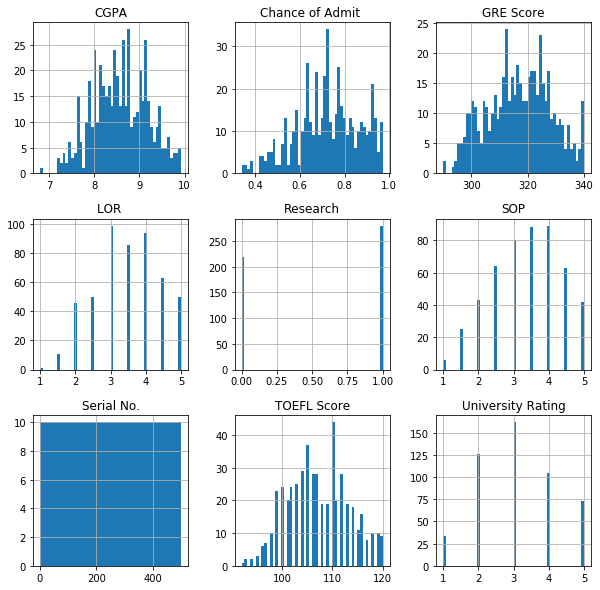

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E4F0FF1C8>,
      dtype=object)

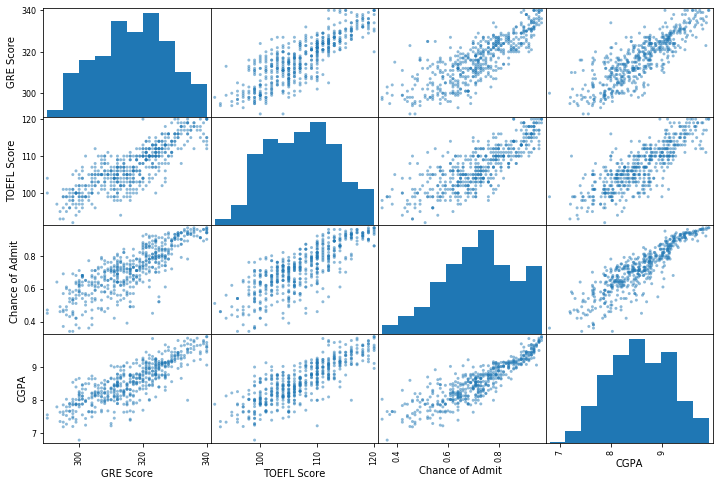

In [101]:
from pandas.plotting import scatter_matrix

attributes = ['GRE Score', "TOEFL Score", "Chance of Admit ",
              "CGPA"]
scatter_matrix(df[attributes], figsize=(12, 8))

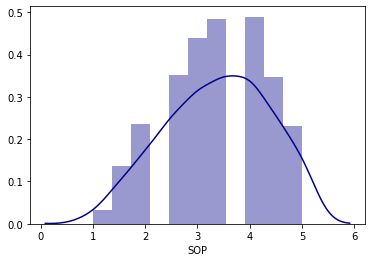

In [102]:
sns.color_palette("Paired")
sns.distplot(df['SOP'], color = 'darkblue')

In [103]:
df['LOR '].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
5.0    50
2.5    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

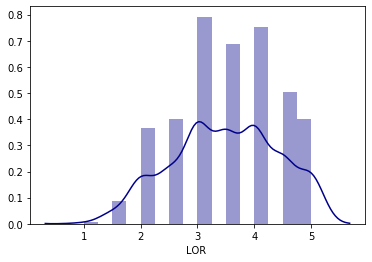

In [104]:
sns.distplot(df['LOR '], color = 'darkblue')

In [105]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


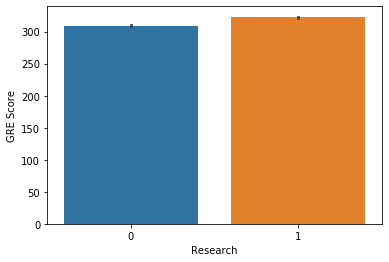

In [106]:
sns.barplot(x = 'Research', y = 'GRE Score', data = df)

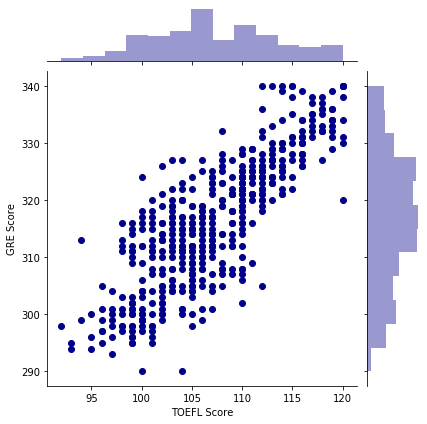

In [107]:
sns.jointplot(x = 'TOEFL Score', y = 'GRE Score', color = 'darkblue', data = df)

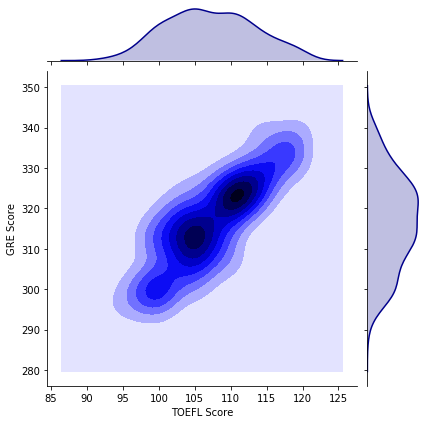

In [108]:
sns.jointplot(x = 'TOEFL Score', y = 'GRE Score', kind = 'kde', data = df, color = 'darkblue')

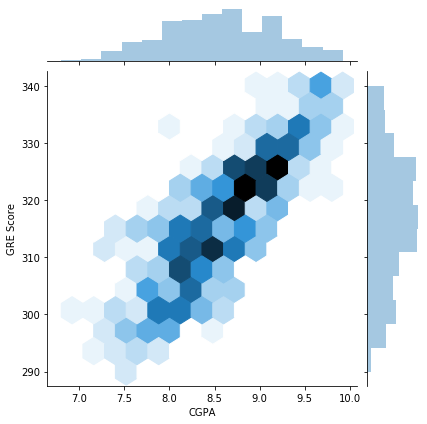

In [109]:
sns.jointplot(x = 'CGPA', y = 'GRE Score', kind = 'hex', data = df)

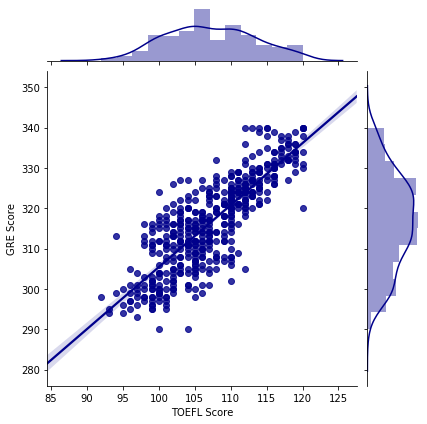

In [110]:
sns.jointplot(x = 'TOEFL Score', y = 'GRE Score', kind = 'reg', data = df, color = 'darkblue')

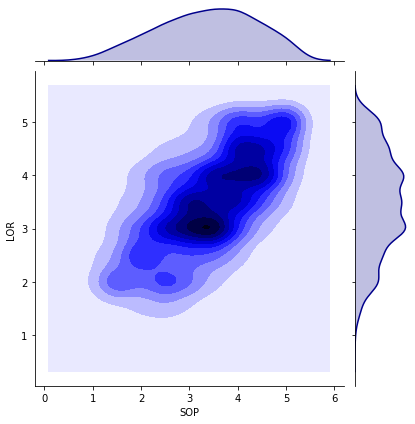

In [111]:
sns.jointplot(x = 'SOP', y = 'LOR ', kind = 'kde', color = 'darkblue', data = df)

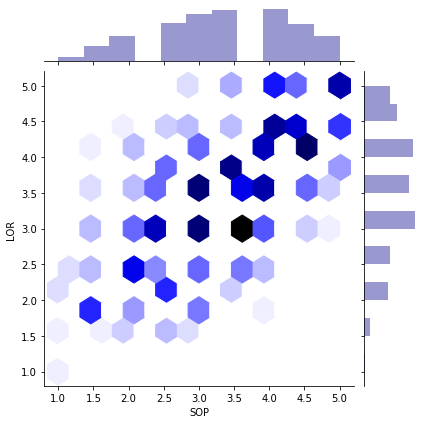

In [112]:
sns.jointplot(x = 'SOP', y = 'LOR ', kind = 'hex', color = 'darkblue', data = df)

In [113]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [114]:
X = df.drop(['Chance of Admit ', 'Serial No.'], axis = 1) #dropping the columns that are not necessary for the input such as the serial number and chance of admit
y = df['Chance of Admit ']                                

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)  
X_train = X_train.T                                  #taking the transpose of the training set for simplicity
X_test = X_test.T                                    #taking the transpose of the testing set for simplicity
y_train = y_train[:, np.newaxis]                     #converting it into a n-dimensional vector
y_test = y_test[:, np.newaxis]                       #converting it to n-dimensional vector
y_train = y_train.T                                  #taking transpose for simplicity
y_test = y_test.T                                    #taking the transpose for simplicity
y = y[:, np.newaxis]
X = X.T                                              
y = y.T                                              
print('the shape of the input is {}'.format(X.shape))    
print('the shape of the output is {}'.format(y.shape))   
print('the shape of the input training set is {}'.format(X_train.shape))  
print('the shape of the output training set is {}'.format(y_train.shape)) 
print('the shape of the input training set is {}'.format(X_test.shape))   
print('the shape of the output training set is {}'.format(y_test.shape)) 

the shape of the input is (7, 500)
the shape of the output is (1, 500)
the shape of the input training set is (7, 335)
the shape of the output training set is (1, 335)
the shape of the input training set is (7, 165)
the shape of the output training set is (1, 165)


In [116]:
def initialize_parameters(n_x, n_h, n_y):     #initializeing the weights and biases
    w1 = np.random.randn(n_h, n_x) * 0.01     
    b1 = np.zeros((n_h, 1))                   
    w2 = np.random.randn(n_y, n_h) * 0.01     
    b2 = np.zeros((n_y, 1))                   
    parameters = {"w1": w1, "b1": b1, "w2": w2, "b2": b2}  
    return parameters                         

In [117]:
def initialize_parameters_deep(layer_dims):   #createing weights and biases for all the L layers in the neural network
    L = len(layer_dims)                       
    parameters = {}                           
    for l in range(1, L):                    
        parameters['w' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01  
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))                              
    return parameters                         

In [119]:
def linear_forward(a, w, b):  
    z = np.dot(w, a) + b      
    cache = (a, w, b)         
    return z, cache           

In [120]:
def linear_activation_forward(a_prev, w, b, activation): #calculating both the linear part and also the activation parts in the network
    if activation == "sigmoid":                         
        z, linear_cache = linear_forward(a_prev, w, b)   
        a, activation_cache = sigmoid(z)                 
    elif activation == "relu":                           
        z, linear_cache = linear_forward(a_prev, w, b)   
        a, activation_cache = relu(z)                    
    cache = (linear_cache, activation_cache)             
    return a, cache                                      

In [121]:
def L_model_forward(X, parameters):                      
    caches = []                                        
    a = X                                               
    L = len(parameters) // 2                          
    for l in range(1, L):
        a_prev = a
        a, cache = linear_activation_forward(a_prev, parameters['w' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
    al, cache = linear_activation_forward(a, parameters['w' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    return al, caches

In [122]:
def compute_cost(a, y):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    cost = np.squeeze(cost)
    return cost

In [123]:
def linear_backward(dz, cache):
    a_prev, w, b = cache
    m = a_prev.shape[1]
    dw = (1 / m) * np.dot(dz, a_prev.T)
    db = (1 / m) * np.sum(dz, axis = 1, keepdims = True)
    da_prev = np.dot(w.T, dz)
    return da_prev, dw, db

In [124]:
def linear_activation_backward(da, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dz = relu_backward(da, activation_cache)
        da_prev, dw, db = linear_backward(dz, linear_cache)
    elif activation == "sigmoid":
        dz = sigmoid_backward(da, activation_cache)
        da_prev, dw, db = linear_backward(dz, linear_cache)
    return da_prev, dw, db
        

In [125]:
def L_model_backward(al, y, caches):
    grads = {}
    L = len(caches)
    m = al.shape[1]
    y = y.reshape(al.shape)
    dal = - (np.divide(y, al) - np.divide(1 - y, 1 - al))
    current_cache = caches[L - 1]
    grads["da" + str(L-1)], grads["dw" + str(L)], grads["db" + str(L)] = linear_activation_backward(dal, current_cache, activation = "sigmoid")
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        da_prev_temp, dw_temp, db_temp = linear_activation_backward(grads["da" + str(l + 1)], current_cache, activation = "relu")
        grads["da" + str(l)] = da_prev_temp
        grads["dw" + str(l + 1)] = dw_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [126]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["w" + str(l + 1)] = parameters["w" + str(l + 1)] - learning_rate * grads["dw" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters 

In [128]:
def two_layer_model(X, y, layers_dims, learning_rate = 0.001, num_iterations = 10000, print_cost = False):
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        a1, cache1 = linear_activation_forward(X, w1, b1, activation = "relu")
        a2, cache2 = linear_activation_forward(a1, w2, b2, activation = "sigmoid")
        cost = compute_cost(a2, y)
        da2 = - (np.divide(y, a2) - np.divide(1 - y, 1 - a2))
        da1, dw2, db2 = linear_activation_backward(da2, cache2, activation = "sigmoid")
        da0, dw1, db1 = linear_activation_backward(da1, cache1, activation = "relu")
        grads["dw1"] = dw1
        grads["db1"] = db1
        grads["dw2"] = dw2
        grads["db2"] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        w1 = parameters["w1"]
        b1 = parameters["b1"]
        w2 = parameters["w2"]
        b2 = parameters["b2"]
        if print_cost and i % 1000 == 0:
            print("cost after iteration {}:: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters    

In [129]:
layers_dims = [X.shape[0], 50, 25, 1]

In [130]:
def L_layer_model(X, y, layers_dims, learning_rate = 0.03, num_iterations = 3000, print_cost = False):
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        al, caches = L_model_forward(X, parameters)
        cost = compute_cost(al, y)
        grads = L_model_backward(al, y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return parameters

Cost after iteration 0: 0.6918064045070336
Cost after iteration 1000: 0.5892620152186919
Cost after iteration 2000: 0.5885088802382671
Cost after iteration 3000: 0.5872056786105231
Cost after iteration 4000: 0.5856118288977075
Cost after iteration 5000: 0.5840496710775845
Cost after iteration 6000: 0.5826206379480032
Cost after iteration 7000: 0.5813375137268226
Cost after iteration 8000: 0.5801850165006253
Cost after iteration 9000: 0.5792119888932924
Cost after iteration 10000: 0.5783234925656999
Cost after iteration 11000: 0.5775689625140354
Cost after iteration 12000: 0.5768479598419721
Cost after iteration 13000: 0.5760292790685456
Cost after iteration 14000: 0.5751461392542107
Cost after iteration 15000: 0.5745205307419731
Cost after iteration 16000: 0.5736688892755115
Cost after iteration 17000: 0.5731610410003326
Cost after iteration 18000: 0.5726441777178306
Cost after iteration 19000: 0.5721987072135433
Cost after iteration 20000: 0.5719128752580266
Cost after iteration 21000

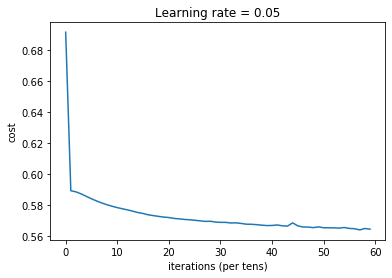

In [141]:
parameters = L_layer_model(X_train, y_train, layers_dims,learning_rate = 0.05, num_iterations = 60000, print_cost = True)

In [142]:
def predict(parameters, X):
    a2, cache = L_model_forward(X, parameters)
    predictions = a2
    return predictions

In [143]:
predictions_test = predict(parameters, X_test)
predictions_train = predict(parameters, X_train)
print('The accuracy of the training model: {}%'.format((1 - np.sum(np.abs(predictions_train - y_train))/predictions_train.shape[1]) * 100))
print('The accuracy of the testing model: {}%'.format((1 - np.sum(np.abs(predictions_test - y_test))/predictions_test.shape[1]) * 100))

The accuracy of the training model: 93.14600131927959%
The accuracy of the testing model: 92.86340265740574%


In [144]:
predictions_test = predict(parameters, X_test)
predictions_train = predict(parameters, X_train)
print('The accuracy of the training model: {}%'.format((1 - np.sum(np.abs(predictions_train - y_train))/predictions_train.shape[1]) * 100))
print('The accuracy of the testing model: {}%'.format((1 - np.sum(np.abs(predictions_test - y_test))/predictions_test.shape[1]) * 100))


The accuracy of the training model: 93.14600131927959%
The accuracy of the testing model: 92.86340265740574%


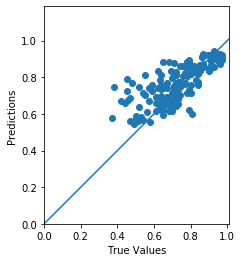

In [145]:
plt.scatter(y_test, predictions_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])